In [23]:
# Import libraries
import numpy as np
import pandas as pd

In [24]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
from sklearn.metrics import mean_absolute_error
print(tf.__version__)
from sklearn.utils import shuffle

2.3.0


In [25]:
# Read datasets
dataset = pd.read_csv('df_modred_new_chems.csv')
dataset = dataset.select_dtypes([np.number])

In [26]:
dataset.drop(['# Total Atoms', '# Atoms w/o Salt'], axis =1)

,OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,Log C:M Ratio Non-Lipid Normalized,ABC,ABCGG,nAcid,nBase,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,3.869030,0.710000,2.257800,0.353685,0.710000,-0.148742,15.234431,12.462543,0,0,...,9.768984,53.323569,268.157563,6.703939,899,30,100,115,7.777778,4.444444
1,2.983590,0.923077,2.935385,0.467665,0.923077,-0.034762,10.146784,9.272626,0,0,...,9.182866,44.834790,193.110279,6.658975,331,18,64,71,5.944444,3.305556
2,3.862940,1.062500,3.378750,0.528756,1.062500,0.026329,14.389425,12.507389,0,0,...,9.435163,52.355966,277.204179,5.897961,970,26,90,99,8.055556,4.805556
3,3.930210,11.888889,37.806667,1.577568,11.888889,1.075141,17.625299,14.440378,0,0,...,9.913982,58.055175,324.220163,6.235003,1535,38,116,135,8.777778,5.777778
4,1.859960,56.275862,178.957241,2.252749,56.275862,1.750322,8.663621,8.064700,0,0,...,8.952217,41.876660,165.078979,7.177347,211,14,54,59,4.833333,2.861111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,0.623318,1.982152,0.297137,0.623318,-0.205290,3.464102,3.464102,4,0,...,7.625107,29.418928,98.949060,19.789812,16,0,20,16,4.062500,1.000000
260,-0.596378,0.788030,2.505935,0.398970,0.788030,-0.103457,2.828427,3.146264,0,0,...,6.192362,25.583106,72.021129,8.002348,20,2,14,12,2.750000,1.500000
261,1.149400,0.812831,2.584801,0.412427,0.812831,-0.090000,8.582741,7.990357,0,0,...,9.335651,56.060906,147.032028,9.189502,137,15,58,69,3.694444,2.416667
262,0.560862,0.897436,2.853846,0.455431,0.897436,-0.046997,1.414214,1.414214,1,0,...,4.174387,17.310771,57.975694,19.325231,4,0,6,4,2.250000,1.000000


In [27]:
dataset.head()

,OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,Log C:M Ratio Non-Lipid Normalized,# Total Atoms,# Atoms w/o Salt,ABC,ABCGG,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,3.86903,0.710000,2.257800,0.353685,0.710000,-0.148742,20.0,20.0,15.234431,12.462543,...,9.768984,53.323569,268.157563,6.703939,899,30,100,115,7.777778,4.444444
1,2.98359,0.923077,2.935385,0.467665,0.923077,-0.034762,14.0,14.0,10.146784,9.272626,...,9.182866,44.834790,193.110279,6.658975,331,18,64,71,5.944444,3.305556
2,3.86294,1.062500,3.378750,0.528756,1.062500,0.026329,20.0,20.0,14.389425,12.507389,...,9.435163,52.355966,277.204179,5.897961,970,26,90,99,8.055556,4.805556
3,3.93021,11.888889,37.806667,1.577568,11.888889,1.075141,24.0,24.0,17.625299,14.440378,...,9.913982,58.055175,324.220163,6.235003,1535,38,116,135,8.777778,5.777778
4,1.85996,56.275862,178.957241,2.252749,56.275862,1.750322,12.0,12.0,8.663621,8.064700,...,8.952217,41.876660,165.078979,7.177347,211,14,54,59,4.833333,2.861111


In [28]:
df_PFAS = pd.read_csv('df_modred_priorityPFAS.csv')
df_PFAS = df_PFAS.select_dtypes([np.number])
df_PFAS.head()

,Unnamed: 0,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,Log C:M Ratio Non-Lipid Normalized,AVERAGE_MASS,MONOISOTOPIC_MASS,ABC,ABCGG,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,0.556190,1.766190,0.101905,0.556190,-0.254776,414.070,413.973702,18.943106,19.807281,...,10.828718,61.300856,413.973703,15.922065,1248,60,138,174,17.548611,4.8750
1,0,0.840588,2.674706,0.408824,0.840588,-0.075417,500.130,499.937494,22.219488,22.990790,...,11.040310,66.231424,499.937495,16.664583,1864,72,164,208,20.562500,5.5000
2,2,0.635000,2.017857,0.236429,0.635000,-0.197226,464.078,463.970508,21.287529,22.121530,...,10.971039,64.948009,463.970509,15.998983,1701,69,156,198,19.611111,5.4375
3,3,0.706667,2.245833,0.275833,0.706667,-0.150785,400.110,399.943881,17.530641,18.353312,...,10.755880,58.929131,399.943882,16.664328,988,54,128,160,16.437500,4.3750
4,5,0.860000,2.730000,0.440000,0.860000,-0.065502,300.090,299.950268,12.841795,13.618942,...,10.356885,51.159578,299.950269,16.663904,436,36,92,112,12.312500,3.2500


In [29]:
df_PFAS = df_PFAS.loc[:,df_PFAS.columns.isin(dataset.columns)]

In [30]:
df_PFAS

,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,Log C:M Ratio Non-Lipid Normalized,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.556190,1.766190,0.101905,0.556190,-0.254776,18.943106,19.807281,1,0,25.529641,...,10.828718,61.300856,413.973703,15.922065,1248,60,138,174,17.548611,4.8750
1,0.840588,2.674706,0.408824,0.840588,-0.075417,22.219488,22.990790,1,0,29.289011,...,11.040310,66.231424,499.937495,16.664583,1864,72,164,208,20.562500,5.5000
2,0.635000,2.017857,0.236429,0.635000,-0.197226,21.287529,22.121530,1,0,28.683938,...,10.971039,64.948009,463.970509,15.998983,1701,69,156,198,19.611111,5.4375
3,0.706667,2.245833,0.275833,0.706667,-0.150785,17.530641,18.353312,1,0,22.980418,...,10.755880,58.929131,399.943882,16.664328,988,54,128,160,16.437500,4.3750
4,0.860000,2.730000,0.440000,0.860000,-0.065502,12.841795,13.618942,1,0,16.671824,...,10.356885,51.159578,299.950269,16.663904,436,36,92,112,12.312500,3.2500
5,NaN,NaN,NaN,NaN,NaN,15.056101,15.603435,1,0,20.003303,...,10.366876,54.618667,329.975004,15.713095,716,39,106,126,13.673611,3.9375


In [31]:
# drop values that have 0 as the ratio
dataset = dataset[dataset['C:M Ratio Lipid Normalized'] != 0]

In [32]:
dataset.shape

(264, 1133)

In [33]:
dataset['C:M Ratio Lipid Normalized'] = dataset['C:M Ratio Lipid Normalized'].replace(0, 0.01)
dataset['logCM'] = np.log10(dataset['C:M Ratio Lipid Normalized'])

In [34]:
dataset['logCM_non_adjusted'] = np.log10(dataset['C:M Ratio Non-Lipid Normalized'])

In [35]:
# Rhow dataframe column names
dataset.columns.values

array(['OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED', 'C:M Ratio Master',
       'C:M Ratio Lipid Normalized', ..., 'mZagreb2', 'logCM',
       'logCM_non_adjusted'], dtype=object)

In [36]:
dataset.head()

,OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,Log C:M Ratio Non-Lipid Normalized,# Total Atoms,# Atoms w/o Salt,ABC,ABCGG,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,logCM,logCM_non_adjusted
0,3.86903,0.710000,2.257800,0.353685,0.710000,-0.148742,20.0,20.0,15.234431,12.462543,...,268.157563,6.703939,899,30,100,115,7.777778,4.444444,0.353685,-0.148742
1,2.98359,0.923077,2.935385,0.467665,0.923077,-0.034762,14.0,14.0,10.146784,9.272626,...,193.110279,6.658975,331,18,64,71,5.944444,3.305556,0.467665,-0.034762
2,3.86294,1.062500,3.378750,0.528756,1.062500,0.026329,20.0,20.0,14.389425,12.507389,...,277.204179,5.897961,970,26,90,99,8.055556,4.805556,0.528756,0.026329
3,3.93021,11.888889,37.806667,1.577568,11.888889,1.075141,24.0,24.0,17.625299,14.440378,...,324.220163,6.235003,1535,38,116,135,8.777778,5.777778,1.577568,1.075141
4,1.85996,56.275862,178.957241,2.252749,56.275862,1.750322,12.0,12.0,8.663621,8.064700,...,165.078979,7.177347,211,14,54,59,4.833333,2.861111,2.252749,1.750322


In [37]:
# Assign X and y variables
X = dataset.loc[:, 'ABC':'mZagreb2'].values
y = dataset.loc[:, 'logCM_non_adjusted'].values

In [38]:
# drop values that have 0 as the ratio
df_PFAS = df_PFAS[df_PFAS['C:M Ratio Lipid Normalized'] != 0]

In [39]:
df_PFAS.shape

(6, 1130)

In [40]:
df_PFAS['C:M Ratio Lipid Normalized'] = df_PFAS['C:M Ratio Lipid Normalized'].replace(0, 0.01)
df_PFAS['logCM'] = np.log10(df_PFAS['C:M Ratio Lipid Normalized'])

In [41]:
columnsTitles = dataset.columns.values
df_PFAS = df_PFAS.reindex(columns=columnsTitles)

In [42]:
# Rhow dataframe column names
df_PFAS.columns.values

array(['OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED', 'C:M Ratio Master',
       'C:M Ratio Lipid Normalized', ..., 'mZagreb2', 'logCM',
       'logCM_non_adjusted'], dtype=object)

In [43]:
# Assign X and y variables
X_PFAS = df_PFAS.loc[:, 'ABC':'mZagreb2'].values
y_PFAS = df_PFAS.loc[:, 'logCM_non_adjusted'].values

In [59]:
df_PFAS

,OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,Log C:M Ratio Non-Lipid Normalized,# Total Atoms,# Atoms w/o Salt,ABC,ABCGG,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,logCM,logCM_non_adjusted
0,NaN,0.556190,1.766190,0.101905,0.556190,-0.254776,NaN,NaN,18.943106,19.807281,...,413.973703,15.922065,1248,60,138,174,17.548611,4.8750,0.247038,NaN
1,NaN,0.840588,2.674706,0.408824,0.840588,-0.075417,NaN,NaN,22.219488,22.990790,...,499.937495,16.664583,1864,72,164,208,20.562500,5.5000,0.427276,NaN
2,NaN,0.635000,2.017857,0.236429,0.635000,-0.197226,NaN,NaN,21.287529,22.121530,...,463.970509,15.998983,1701,69,156,198,19.611111,5.4375,0.304890,NaN
3,NaN,0.706667,2.245833,0.275833,0.706667,-0.150785,NaN,NaN,17.530641,18.353312,...,399.943882,16.664328,988,54,128,160,16.437500,4.3750,0.351378,NaN
4,NaN,0.860000,2.730000,0.440000,0.860000,-0.065502,NaN,NaN,12.841795,13.618942,...,299.950269,16.663904,436,36,92,112,12.312500,3.2500,0.436163,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.056101,15.603435,...,329.975004,15.713095,716,39,106,126,13.673611,3.9375,NaN,NaN


In [58]:
y_PFAS

array([nan, nan, nan, nan, nan, nan])

In [44]:
for i in range(25):
    
    # y-randomization step -  use only for y-randomization analyis (to use remove '#')
    #y = shuffle(y, random_state=1)
    
    # Split dataframe into training and testing set
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    
    X_train = X
    y_train = y
    X_test = X_PFAS
    y_test = y_PFAS
    
    
    # Normalize data
    from sklearn.preprocessing import StandardScaler

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Compile the ANN model
    def build_model():
        model = keras.Sequential([
        keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(100, activation='exponential'),
        keras.layers.Dense(1)
      ])

        optimizer = tf.optimizers.Adamax(0.001)

        model.compile(loss='mae',
                    optimizer=optimizer,
                    metrics=['mae'])
        return model

    model = build_model()
    #model.summary()

    # Display training progress by printing a single dot for each completed epoch
    class PrintDot(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs):
            if epoch % 100 == 0: print('')
            print('.', end='')

    EPOCHS = 500

    # The patience parameter is the amount of epochs to check for improvement
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=150)

    history = model.fit(X_train, y_train, epochs=EPOCHS,
                        validation_split=0.2, verbose=0,
                        callbacks=[early_stop, PrintDot()])

    # Export data into a dataframe
    import pandas as pd
    # Use model to predict data for training set
    from sklearn import metrics
    y_pred = model.predict(X_train).flatten()
    
    df = pd.DataFrame({'true_values':y_train,'predicted_values':y_pred})
    print(df.head())

    # Print data to a csv file
    df.to_csv('ANN_plus_tr_' + str(i) + '.csv')

    # Use model to make predictions for the testing set
    y_pred = model.predict(X_test).flatten()

    # Export data into a dataframe
    df = pd.DataFrame({'true_values':y_test,'predicted_values':y_pred})
    print(df.head())

    # Print dataframe
    df.to_csv('ANN_plus_ts_' + str(i) + '.csv')


....................................................................................................
......................................................   true_values  predicted_values
0    -0.148742         -0.126978
1    -0.034762         -0.004050
2     0.026329          0.029794
3     1.075141          0.916170
4     1.750322          1.462155
   true_values  predicted_values
0          NaN         -0.073389
1          NaN         -0.170693
2          NaN         -0.151392
3          NaN         -0.131975
4          NaN         -0.080678

....................................................................................................
............................................................   true_values  predicted_values
0    -0.148742         -0.111781
1    -0.034762         -0.019160
2     0.026329          0.038659
3     1.075141          0.942421
4     1.750322          1.556734
   true_values  predicted_values
0          NaN         -0.070281
1          NaN        

In [45]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

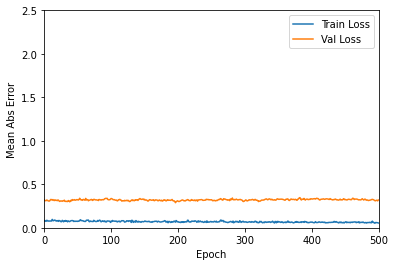

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot()
ax.plot(history.epoch, np.array(history.history['mae']),
           label='Train Loss')
ax.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.legend()
plt.ylim([0, 2.5])
plt.xlim([0, 500])
plt.show()
#fig.savefig('train_val_entact_500_20.png', dpi=400)


.......................................................................

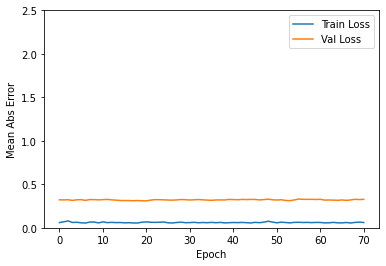

In [47]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

fig = plt.figure()
ax = plt.subplot()
ax.plot(history.epoch, np.array(history.history['mae']),
           label='Train Loss')
ax.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.legend()
plt.ylim([0, 2.5])
plt.show()
#fig.savefig('train_val_entact_20.png', dpi=400)

In [48]:
# Use model to predict data for training set
from sklearn import metrics

y_pred = model.predict(X_train).flatten()

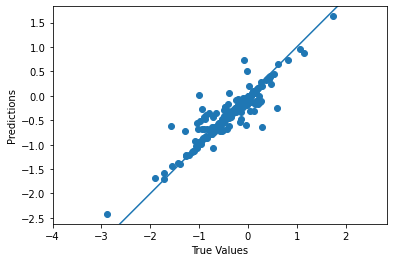

In [49]:
plt.scatter(y_train, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

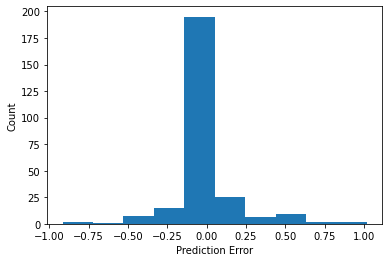

In [50]:
error = y_pred - y_train
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [51]:
# Export data into a dataframe
import pandas as pd
df = pd.DataFrame({'true_values':y_train,'predicted_values':y_pred})
print(df.head())

   true_values  predicted_values
0    -0.148742         -0.174466
1    -0.034762         -0.050346
2     0.026329         -0.004949
3     1.075141          0.950481
4     1.750322          1.631300


In [52]:
# Print data to a csv file
df.to_csv('ANN_plus_tr_5.csv')

In [53]:
# Use model to make predictions for the testing set
y_pred = model.predict(X_test).flatten()

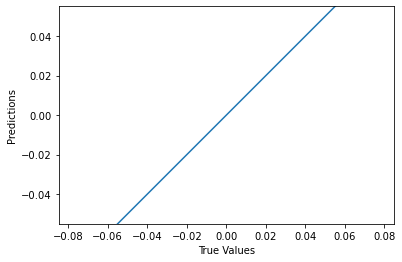

In [54]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [57]:
y_test

array([nan, nan, nan, nan, nan, nan])

In [56]:
y_pred

array([-0.10994209, -0.24616162, -0.1937568 , -0.1754072 , -0.11582418,
       -0.07384077], dtype=float32)

C:\Users\Adi\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6620: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\Adi\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6621: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

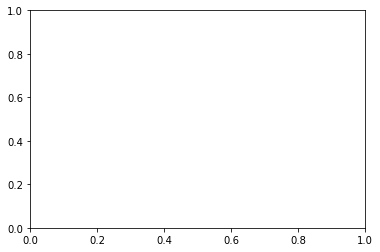

In [55]:
error = y_pred - y_test
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [ ]:
# Export data into a dataframe
df = pd.DataFrame({'true_values':y_test,'predicted_values':y_pred})
print(df.head())

In [ ]:
# Print dataframe
df.to_csv('ANN_plus_ts_5.csv')

In [ ]:
#Summarize results into one csv file
ts1 = pd.read_csv('ANN_plus_ts_0.csv')
ts2 = pd.read_csv('ANN_plus_ts_1.csv')
ts3 = pd.read_csv('ANN_plus_ts_2.csv')
ts4 = pd.read_csv('ANN_plus_ts_3.csv')
ts5 = pd.read_csv('ANN_plus_ts_4.csv')

ts6 = pd.read_csv('ANN_plus_ts_5.csv')
ts7 = pd.read_csv('ANN_plus_ts_6.csv')
ts8 = pd.read_csv('ANN_plus_ts_7.csv')
ts9 = pd.read_csv('ANN_plus_ts_8.csv')
ts10 = pd.read_csv('ANN_plus_ts_9.csv')

ts11 = pd.read_csv('ANN_plus_ts_10.csv')
ts12 = pd.read_csv('ANN_plus_ts_11.csv')
ts13 = pd.read_csv('ANN_plus_ts_12.csv')
ts14 = pd.read_csv('ANN_plus_ts_13.csv')
ts15 = pd.read_csv('ANN_plus_ts_14.csv')

ts16 = pd.read_csv('ANN_plus_ts_15.csv')
ts17 = pd.read_csv('ANN_plus_ts_16.csv')
ts18 = pd.read_csv('ANN_plus_ts_17.csv')
ts19 = pd.read_csv('ANN_plus_ts_18.csv')
ts20 = pd.read_csv('ANN_plus_ts_19.csv')

ts21 = pd.read_csv('ANN_plus_ts_20.csv')
ts22 = pd.read_csv('ANN_plus_ts_21.csv')
ts23 = pd.read_csv('ANN_plus_ts_22.csv')
ts24 = pd.read_csv('ANN_plus_ts_23.csv')
ts25 = pd.read_csv('ANN_plus_ts_24.csv')
ts = pd.concat([ts1,ts2,ts3,ts4,ts5, 
                ts6,ts7,ts8,ts9,ts10, 
                ts11,ts12,ts13,ts14,ts15,
                ts16,ts17,ts18,ts19,ts20,
                ts21,ts22,ts23,ts24,ts25], axis=0)

tr1 = pd.read_csv('ANN_plus_tr_0.csv')
tr2 = pd.read_csv('ANN_plus_tr_1.csv')
tr3 = pd.read_csv('ANN_plus_tr_2.csv')
tr4 = pd.read_csv('ANN_plus_tr_3.csv')
tr5 = pd.read_csv('ANN_plus_tr_4.csv')

tr6 = pd.read_csv('ANN_plus_tr_5.csv')
tr7 = pd.read_csv('ANN_plus_tr_6.csv')
tr8 = pd.read_csv('ANN_plus_tr_7.csv')
tr9 = pd.read_csv('ANN_plus_tr_8.csv')
tr10 = pd.read_csv('ANN_plus_tr_9.csv')

tr11 = pd.read_csv('ANN_plus_tr_10.csv')
tr12 = pd.read_csv('ANN_plus_tr_11.csv')
tr13 = pd.read_csv('ANN_plus_tr_12.csv')
tr14 = pd.read_csv('ANN_plus_tr_13.csv')
tr15 = pd.read_csv('ANN_plus_tr_14.csv')

tr16 = pd.read_csv('ANN_plus_tr_15.csv')
tr17 = pd.read_csv('ANN_plus_tr_16.csv')
tr18 = pd.read_csv('ANN_plus_tr_17.csv')
tr19 = pd.read_csv('ANN_plus_tr_18.csv')
tr20 = pd.read_csv('ANN_plus_tr_19.csv')

tr21 = pd.read_csv('ANN_plus_tr_20.csv')
tr22 = pd.read_csv('ANN_plus_tr_21.csv')
tr23 = pd.read_csv('ANN_plus_tr_22.csv')
tr24 = pd.read_csv('ANN_plus_tr_23.csv')
tr25 = pd.read_csv('ANN_plus_tr_24.csv')
tr = pd.concat([tr1,tr2,tr3,tr4,tr5, 
                tr6,tr7,tr8,tr9,tr10, 
                tr11,tr12,tr13,tr14,tr15,
                tr16,tr17,tr18,tr19,tr20,
                tr21,tr22,tr23,tr24,tr25], axis=0)

ts.to_csv('ANN_plus_ts.csv')
tr.to_csv('ANN_plus_tr.csv')

In [ ]:
full_test = ts
full_train = tr

In [ ]:
full_y_train_true = full_train['true_values']
full_y_train_pred = full_train['predicted_values']

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
full_test

In [ ]:
# set up true and pred values from the test dataset 
full_y_test_true = full_test['true_values']
full_y_test_pred = full_test['predicted_values']

In [ ]:
plt.scatter(full_y_test_true, full_y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
#plt.show()
plt.savefig('ANN_mordred_test.png', dpi=300)

In [ ]:
full_y_train_true = full_train['true_values']
full_y_train_pred = full_train['predicted_values']

In [ ]:
plt.scatter(full_y_train_true, full_y_train_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
#plt.show()
plt.savefig('ANN_mordred_train.png', dpi=300)

In [ ]:
print("Train MAE: " + str(mean_absolute_error(full_train['true_values'], full_train['predicted_values'])))

In [ ]:
train_r = np.corrcoef(full_y_train_true, full_y_train_pred)
print("Train R2 Score: " + str(train_r[0, 1]**2))

In [ ]:
print("Test MAE: " + str(mean_absolute_error(full_test['true_values'], full_test['predicted_values'])))

In [ ]:
test_r = np.corrcoef(full_y_test_true, full_y_test_pred)
print("Test R2 Score: " + str(test_r[0, 1]**2))